<a href="https://colab.research.google.com/github/steffiangel/AML/blob/main/LAB10_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
n_rooms = 6
goal = 5
n_episodes = 1000
learning_rate = 0.8
discount = 0.95

In [ ]:
paths={
    0: [4],
    1: [3, 5],
    2: [3],
    3: [1, 2, 4],
    4: [0, 3, 5],
    5: [1, 4, 5]
}

In [ ]:
def init_q_matrix():
    return np.full((n_rooms, n_rooms), -1, dtype=float)

In [ ]:
def update_q_matrix(q_matrix, state, action, reward, next_state):
    max_q_next = np.max(q_matrix[next_state, :])
    q_matrix[state, action] = (1 - learning_rate) * q_matrix[state, action] + learning_rate * (reward + discount * max_q_next)

In [ ]:
def q_learn():
    q_matrix = init_q_matrix()

    for episode in range(n_episodes):
        for state in range(n_rooms - 1):
            for action in paths[state]:
                next_state = action if action != goal else goal
                reward = 100 if next_state == goal else 0

                update_q_matrix(q_matrix, state, action, reward, next_state)
    return q_matrix

In [ ]:
#, vmin=None, vmax=None
def print_q(matrix, cmap='inferno', vmin=None, vmax=None):
    labels = ['0','1','2','3','4','5']
    fig, ax = plt.subplots()
    if vmin is not None and vmax is not None:
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    else:
        norm = None
    im = ax.imshow(matrix, cmap='coolwarm', norm=norm)

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='w')
    plt.show()

In [ ]:
def print_best(q_matrix):
    current_state = 0
    path = [current_state]
    while current_state != goal:
        action = np.argmax(q_matrix[current_state, :])
        path.append(action)
        current_state = action
    print('Best path: ', path)

Initial Matrix: 


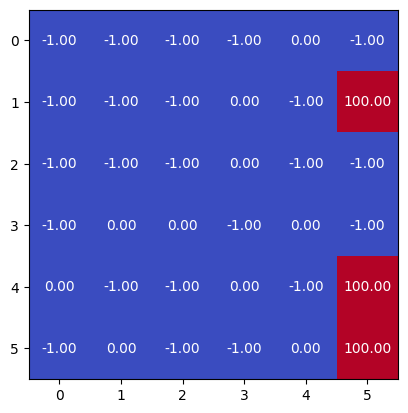



Final Convergence Value Matrix:


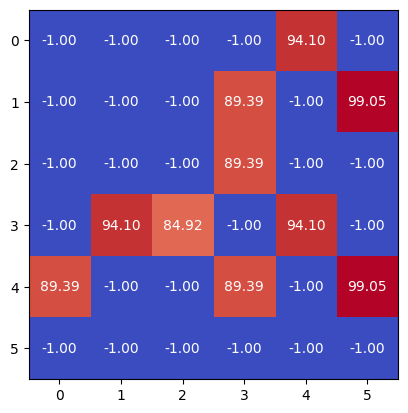



Best path:  [0, 4, 5]


In [ ]:
if __name__ == '__main__':
    final_q_matrix = q_learn()

    print("Initial Matrix: ")
    initial_matrix = np.full((n_rooms, n_rooms), -1, dtype=int)
    for i, row in enumerate(initial_matrix):
        for j in paths[i]:
            if j == goal:
                initial_matrix[i, j] = 100
            else:
                initial_matrix[i, j] = 0
    print_q(initial_matrix, cmap='inferno', vmin=1, vmax=100)
    print("\n")

    print("Final Convergence Value Matrix:")
    print_q(final_q_matrix, cmap='coolwarm', vmin=-1, vmax=np.max(final_q_matrix))
    print("\n")

    print_best(final_q_matrix)